**Imports**

Data

In [3]:
#enter the path to get to your CDs_and_Vinyl folder below
PATH_TO_CDS = '../devided_dataset_v2/CDs_and_Vinyl/'

import pandas as pd

# Open and load json training files
x = pd.read_json(PATH_TO_CDS + 'train/review_training.json')
y = pd.read_json(PATH_TO_CDS + 'train/product_training.json')

Other

In [278]:
import numpy as np
from nltk import sentiment
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
from sklearn.model_selection import cross_validate
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

PATCH TO SPEED UP (ONLY IF INTEL CHIP) 

lmao rip daniel

thanks guys -daniel

In [279]:
from sklearnex import patch_sklearn 

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


**Pre Processing**

In [ ]:
x #770786 entries
y #073082 entries

# Feature creation 

Making a sample set to test features:

In [280]:
#ts = test sample 2 thousand long
ts = x[:2000]
ts

,asin,reviewerID,unixReviewTime,vote,verified,reviewTime,style,reviewerName,reviewText,summary,image
0,6673F1740E03573BCD64238FE711FC69,9C856D4A18E1355783B3B28B7ECC1848,1451520000,0,True,"12 31, 2015",{'Format:': ' MP3 Music'},8D88BB79AAC50277AEE82FCFD77F6744,Finding the Beatles all over again - and bette...,I sit listening - with my jaw to the floor - H...,None
1,690819436E20BB31657AF6B58B984DD4,6E9ABBD26A27C2B2851D1EC34A01CBDC,1113523200,0,False,"04 15, 2005",{'Format:': ' Audio CD'},8DC0611245A871AC51BBEEBB85F33A58,These guys can sing! Such classic tunes...poi...,Under Appreciated....,None
2,A680D4753F0CEA2252C168A6ACB2B623,B637C3C93E61094474710F456928BE9F,1126137600,0,False,"09 8, 2005",None,2259386624CFA0EC53A75A50A9BB57A5,"Snoop Doggy Dogg made a classic album, DoggySt...",DoggyStyle,None
3,F4A966F1FA340B16651D676BC246D227,AA7918E9410D650A076221C7B2934A09,954979200,0,False,"04 6, 2000",{'Format:': ' Audio CD'},7A65A155C993535BC99CBCB39E7161B5,Stevie Nicks Has had Her Moments. I Like Some ...,Pretty Good but a Bit Dated,None
4,EF59DAF0C00319A48D4784266FD157EE,2293C9B7950A3356B95828419A677720,1477958400,0,True,"11 1, 2016",{'Format:': ' Audio CD'},C69A09446009C500B1364B7DB5510497,Great cd.,Five Stars,None
...,...,...,...,...,...,...,...,...,...,...,...
1995,14673A3D627445E270EBD9D11D2F70DD,9C84E3EFF58B759FE040B8938E6BD3DE,1460764800,0,True,"04 16, 2016",{'Format:': ' Audio CD'},1BBF7C11163C6DC130DD1EE87152CFD9,Same review as Vol. 1: Super jamming! Inspir...,Super jamming! Inspired me to get my guitar ou...,None
1996,35A0CA6AE8C14595607D38DAC6525752,3ED9CD1EC55F0D896F93DA465C4712A9,1420243200,0,True,"01 3, 2015",{'Format:': ' Audio CD'},17AD55A9B8384777496330D23E59D520,"WONDERFUL PURCHASE, ""Linda Rondstadt: The Coll...","WONDERFUL PURCHASE, ""Linda Rondstadt",None
1997,1C2F7451F06F0C2958694833095CB947,BA489C468556F643565413143979D571,1388966400,0,True,"01 6, 2014",{'Format:': ' Audio CD'},429889A95D8338A1312654487D673DAA,THIS MUSIC IS NICE. I MEAN WHAT MORE CAN I SAY...,NICE MUSIC,None
1998,C3D898B23687DE2EBB9350FE17F8CD24,FCF6C84C748B7E345693A45636118FAB,1127174400,0,False,"09 20, 2005",{'Format:': ' Audio CD'},3EA8FAFD8BB387929FBB53DDF4C8DAF9,I loved listening to the music of Barbara Str...,Barbara and Barry make musical magic together,None


In [281]:
unixReviewMean = x.groupby('asin')['unixReviewTime'].mean()
unixReviewMean

asin
0000B049F5B33CD310EB1AB236E20191    1.296583e+09
00018184A9EC4D270219A296B2580303    1.111282e+09
000281A9CAC43FF1F335726A390636DA    1.254960e+09
00030884DF109F325638A6BFD5B13CFF    1.315392e+09
000325BA25966B5FC701D5D2B5DBA4E0    1.363802e+09
                                        ...     
FFFDD3C72D23AF858D6E0ED92612370D    1.258704e+09
FFFDDE284A73B29B320381487EC7DE9E    1.353758e+09
FFFEB3EE2372807964F024707D50FB21    1.349050e+09
FFFF4545AB232D81D0F9B208388BB7AA    1.427846e+09
FFFF5A3D9CB0B40FF0FE6B95F05D26FE    1.141706e+09
Name: unixReviewTime, Length: 73082, dtype: float64

In [ ]:
dropUnverified.groupby('asin')['unixReviewTime'].mean() #63401 entries!

Making a single feature ex

In [6]:
dropUnverified = x[x.verified == True]
reviewCount = x.groupby('asin')["reviewerID"].count()
reviewCount = reviewCount.rename("Review_Count")

Percent verified

In [7]:
percent_verified = dropUnverified.groupby("asin")["reviewerID"].count()
percent_verified = percent_verified/reviewCount
percent_verified = percent_verified.apply(lambda x: x if x > 0  else 0)
percent_verified = percent_verified.rename("%_Verified")

In [ ]:
x #73082

dropping bots by time of post

All the comments are encoded with the date only, no time, so this is not possible

In [ ]:
# test1 = x[x.unixReviewTime % 100 != 0]
# test1

total number of votes across reviews

In [8]:
x_copy = x.copy(deep=True)
total_review_num = x_copy.vote
total_review_num = total_review_num.apply(lambda x: float(x.replace(",", "")) if type(x) == str  else 0)
total_review_num = total_review_num.rename("vote").to_frame()
x_copy["vote"] = total_review_num["vote"]
total_votes = x_copy.groupby('asin')["vote"].sum("vote")
total_votes = total_votes.rename("Total_Votes")
total_votes



asin
0000B049F5B33CD310EB1AB236E20191     6.0
00018184A9EC4D270219A296B2580303    45.0
000281A9CAC43FF1F335726A390636DA     5.0
00030884DF109F325638A6BFD5B13CFF    83.0
000325BA25966B5FC701D5D2B5DBA4E0     7.0
                                    ... 
FFFDD3C72D23AF858D6E0ED92612370D    57.0
FFFDDE284A73B29B320381487EC7DE9E     8.0
FFFEB3EE2372807964F024707D50FB21     0.0
FFFF4545AB232D81D0F9B208388BB7AA    11.0
FFFF5A3D9CB0B40FF0FE6B95F05D26FE    68.0
Name: Total_Votes, Length: 73082, dtype: float64

groupby() testing

In [ ]:
# tests = range(5)
# unique_items = z["asin"].nunique()
# print("ui: ", unique_items)

# asin = z["asin"].values
# print("asin: ",asin)
# avg_votes = np.zeros(len(asin))

# for i in tests: # eventually all
#     item = zgrouped.get_group(asin[i])
#     avg_votes[i] = item["vote"].fillna(0).astype(int).mean()

# print("avg_votes: ", avg_votes[0:5])

Percent of reviews with images

In [9]:
#total = ts.groupby('asin')["reviewerID"].count()
with_image = x[x.image.astype('string') != "None"]
with_image = with_image.groupby('asin')["image"].count()
#print(with_image)
#print(total)
with_image_percentage = with_image/reviewCount
#with_image_percentage = with_image_percentage[with_image_percentage > 0]
with_image_percentage = with_image_percentage.apply(lambda x: x if x > 0  else 0)
# returning rn with NaN instead of 0, not sure if thats fine or not??

#with_image_percentage = with_image_percentage[with_image_percentage > 0]
with_image_percentage = with_image_percentage.rename("%_Image")

Making a feature vector
currently has number of reviews, percentage of reviews with images, percentage of reviews that are verified, and total votes across all reviews

In [ ]:
# feature_vector = reviewCount.rename("Review_NUM")
# feature_vector = feature_vector.to_frame().merge(with_image_percentage.rename("Image_PC").to_frame(), left_index=True, right_index=True)
# feature_vector = feature_vector.merge(percent_verified.rename("Verified_PC").to_frame(), left_index=True, right_index=True)
# # fxx = feature_vector[feature_vector.Image_PC > 0]
# # fxx = 
# feature_vector = feature_vector.merge(total_votes.rename("Total_Votes").to_frame(), left_index=True, right_index=True)
# feature_vector

Since I commented out the feature vector, here are the names of each individual feature:

reviewCount

with_image_percentage

percent_verified

total_votes


Hope this clears it up. lmk if its confusing -Daniel

# Text Analysis

In [ ]:
testdata = x.groupby("asin").get_group("0000B049F5B33CD310EB1AB236E20191")

# np.mean(len(str(testdata["reviewText"]).split()))

Length of Reviews Feature

In [11]:
reviewlength = x.groupby('asin')["reviewText"].apply(lambda x: x.str.split().str.len().mean())
reviewlength = reviewlength.fillna(0).rename("Review_Length")

summarylength = x.groupby('asin')["summary"].apply(lambda x: x.str.split().str.len().mean())
summarylength = summarylength.fillna(0).rename("Summary_Length")


Percentage Uppercase Feature:

In [ ]:
# def count_cap(str):
#     stripped = ''.join(str.split())
#     return sum(c.isupper() for c in ''.join(stripped))/len(stripped)

RpercentCap = x.groupby('asin')["reviewText"].apply(lambda x: (x.str.count("[A-Z]")/x.str.len()).mean())
RpercentCap = RpercentCap.fillna(0).rename("Review_Percent_Uppercase")

SpercentCap = x.groupby('asin')["summary"].apply(lambda x: (x.str.count("[A-Z]")/x.str.len()).mean())
SpercentCap = SpercentCap.fillna(0).rename("Summary_Percent_Uppercase")


Actual Awesomeness Feature: # times the word "awesome" is used per review

In [ ]:
actualAwesomeness = x.groupby('asin')["reviewText"].apply(lambda x: (x.str.count("[Aa]wesome")).mean())
actualAwesomeness = actualAwesomeness.fillna(0).rename("Actual_Awesomeness")

# Sentiment Analysis

In [282]:
## Helper function for sentiment
def review_sentiment(sia,text):
    tokens = word_tokenize(text)
    filtered_text = " ".join([w for w in tokens if w not in stopwords.words("English") and w not in string.punctuation])
    # print(filtered_text)
    return sia.polarity_scores(filtered_text)["compound"]

## just some examples to gut check
# print(review_sentiment("Ugh, what a terrible, horrible, no good, very bad day"))
# print(review_sentiment("I went to the store today"))
# print(review_sentiment("I absolutely love my favorite best friend"))

apply sentiment analysis to data

In [283]:
sia = sentiment.SentimentIntensityAnalyzer()
RavgSentiment = x.groupby('asin')["reviewText"].apply(lambda x: np.mean(review_sentiment(sia,x.to_string())))
RavgSentiment = RavgSentiment.fillna(0).rename("Review_Avg_Sentiment")

sia = sentiment.SentimentIntensityAnalyzer()
SavgSentiment = x.groupby('asin')["summary"].apply(lambda x: np.mean(review_sentiment(sia,x.to_string())))
SavgSentiment = RavgSentiment.fillna(0).rename("Summary_Avg_Sentiment")


# sia = sentiment.SentimentIntensityAnalyzer()
# RavgSentiment = x.groupby('asin')["reviewText"].apply(lambda x: np.mean(sia.polarity_scores(x.to_string())["compound"]))
# RavgSentiment = RavgSentiment.fillna(0).rename("Review_Avg_Sentiment")

# SavgSentiment = x.groupby('asin')["summary"].apply(lambda x: np.mean(sia.polarity_scores(x.to_string())["compound"]))
# SavgSentiment = SavgSentiment.fillna(0).rename("Summary_Avg_Sentiment")

# tests = range(1)
# unique_items = z["asin"].nunique()
# print("ui: ", unique_items)

# asin = z["asin"].unique()
# # print("asin: ",asin[tests])
# avg_votes = np.zeros(len(asin))

# for i in tests: # eventually all
#     item = zgrouped.get_group(asin[i])
#     avg_votes[i] = item["vote"].fillna(0).astype(int).mean()
#     print(len(item))
#     sentiments = map(review_sentiment,item["reviewText"].values[0:1000])
    
#     print(list(sentiments))

# print("avg_votes: ", avg_votes[0:5])


KeyboardInterrupt: 

For reference: What x,y should look like

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

#iris.data
#iris.target

# Testing prep

Put feature vector with col 1 as 'asin' to *z*, answers to *y*

Currently using features:

Name                    |     Column Name

reviewCount                    Review_Count

with_image_percentage          %_Image

percent_verified               %_Verified

total_votes                    Total_Votes

reviewlength                   Review_Length

summarylength                  Summary_Length

RpercentCap                    Review_%_Uppercase

SpercentCap                    Summary_%_Uppercase

actualAwesomeness              Actual_Awesomeness

RavgSentiment                  Review_Avg_Sentiment

SavgSentiment                  Summary_Avg_Sentiment


//For pres
//makeup of one we chose
//how we got there aka ones that didn't work
//why not - take a guess at why it didn't work as well

In [17]:
#combine all individual features into one dataFrame

#enter any features to be combined here! 
#   They must be pd dataFrames with the 'asin' column for this to work
features = [reviewCount,percent_verified,total_votes,RavgSentiment,SavgSentiment,reviewlength,summarylength]

z = x['asin']
for f in features:
    z = pd.merge(z,f,'inner','asin')

#combine resultant data with correct answers 
temp = pd.merge(z,y,'inner','asin') 
temp = temp.groupby("asin").mean()


#split into features (x) and awesomeness (y), which now row correspond
# merged_x = temp.drop(['asin','awesomeness'], axis=1)
merged_x = temp.drop(['awesomeness'], axis=1)
merged_y = temp["awesomeness"]

asin
0000B049F5B33CD310EB1AB236E20191    1.0
00018184A9EC4D270219A296B2580303    0.0
000281A9CAC43FF1F335726A390636DA    0.0
00030884DF109F325638A6BFD5B13CFF    1.0
000325BA25966B5FC701D5D2B5DBA4E0    0.0
                                   ... 
FFFDD3C72D23AF858D6E0ED92612370D    1.0
FFFDDE284A73B29B320381487EC7DE9E    1.0
FFFEB3EE2372807964F024707D50FB21    0.0
FFFF4545AB232D81D0F9B208388BB7AA    1.0
FFFF5A3D9CB0B40FF0FE6B95F05D26FE    1.0
Name: awesomeness, Length: 73082, dtype: float64

Test example: 

*Gaussian Naive Bayes with tfidf*

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

#train and apply tfidf
    # fit = make vocab 
    # transform = turn words -> numbers
x_train = tfidf.fit_transform(x_train).toarray()
x_test = tfidf.transform(x_test).toarray()

#make prediction
y_pred = gnb.fit(x_train, y_train).predict(x_test)

#print accuracy
print(f"Number of mislabeled points out of a total {x_test.shape[0]} points : {(y_test != y_pred).sum()}")

# Models

(choose one)

Support Vector Machine (SVM)

In [1]:
from sklearn import svm

#kernel type
#‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
kernel = 'rbf'

#if kernel type = 'poly', degree of poly
degree = 3

#whether to enable probability estimates (will slow it down a lot)
probability = True

#tau - penalty for errors is inversely proportional to C
C = 0.5

param_grid = [{'kernel': ['poly','rbf','sigmoid','precomputed'],
            'C': [0.25,0.5,0.75,1]}]

svm_model = svm.SVC(C=C, kernel=kernel, degree=degree, probability=probability)

Basic Gaussian Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

Decision Tree

In [ ]:
from sklearn import tree

#choose from 'entropy', 'gini', 'log_loss'
criterion = 'entropy'

    ###STOPPING CONDITIONS
#max height/depth of the tree OR None if no limit
max_depth = None

#if sat(N) < n_samples*this, don't try to split it any further
min_samples_split = .01

    ###OTHER
#if min(sat(nodes after a split)) < n_samples*this, split not considered 
#       (aka model isnt allowed to create leaf nodes with < n_samples*this samples)
#       (smooths the model, avoids splits like 2000 -> 1999 vs 1)
min_samples_leaf = 20

param_grid = [{'criterion': ['entropy','gini','log_loss'],
            'max_depth': [None,5,10,15],
            'min_samples_split': [2,0.01,0.05,0.1,0.2],
            'min_samples_leaf':[2,0.01,0.05,0.1,0.2]}]

dtree_model = tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

Decision Tree - See what it looks like! 

(only run if the model is a decision tree)

*note: this trains the model on the whole dataset, so don't do before testing!*

In [ ]:
model.fit(merged_x,merged_y)
tree.plot_tree(model)

K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#number of neighbors
n_neighbors = 5

#do you want proximity to effect influence neighbors have or not
# 'uniform' or 'distance'
weights='uniform'

#leaf size passed to trees
leaf_size=30

# param_grid = [{'n_neighbors': [5,7,9,11],
#             'weights': ['uniform','distance'],
#             'leaf_size':[15,20,25,30]}] -> f1: 0.67, {'leaf_size': 15, 'n_neighbors': 11, 'weights': 'uniform'}

# param_grid = [{'n_neighbors': [9,11,15,19,23],
#              'weights': ['uniform','distance'],
#              'leaf_size':[5,10,15,20]}] -> f1: 0.65, {'leaf_size': 5, 'n_neighbors': 23, 'weights': 'uniform'}

# param_grid = [{'n_neighbors': [11,22,33,44,55],
#              'weights': ['uniform','distance'],
#              'leaf_size':[1,2,3,4,5,6,7,8,9,10,11,12]}] -> f1: 0.63....... {'leaf_size': 1, 'n_neighbors': 55, 'weights': 'uniform'}

param_grid = [{'n_neighbors': [11,22,33,44,55],
             'weights': ['uniform','distance'],
             'leaf_size':[1,2,3,4,5,6,7,8,9,10,11,12]}]

knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, leaf_size=leaf_size, n_jobs=-1)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#norm of the penalty
#‘l1’, ‘l2’, ‘elasticnet’, None
penalty = 'l2'

#inverse of regulation strength tau - how much do errors cost?
C = 0.5

#algorithm to compute optimization problem. Probs wont do much other than speed
#‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’
solver = 'sag'

max_iter=1000

# param_grid = [{'penalty': ['l1','l2','elasticnet',None],
#             'C': [0.25,0.5,0.75,1],
#             'solver': ['lbfgs','newton-cg','newton-cholesky','sag','saga'],
#             'max_iter': [1000,500,100]}]        
# -> {'C': 0.5, 'max_iter': 500, 'penalty': 'l2', 'solver': 'sag'}
# f1: 0.6916044272473679

# param_grid = [{'C': [0.4,0.45,0.5,0.55,0.6],
#             'solver': ['lbfgs','newton-cg','newton-cholesky','sag','saga'],
#             'max_iter': [700,600,500,400,300]}]
# -> {'C': 0.5, 'max_iter': 500, 'penalty': 'l2', 'solver': 'sag'}
# f1: same

regression_model = LogisticRegression(penalty=penalty, C=C, solver=solver, max_iter=max_iter, n_jobs=-1)

Try nonlinear regression by manipulating given features:

In [ ]:
#how to transform features!
#np.sqrt, np.log, np.square
f = np.sqrt

merged_x = merged_x.apply(lambda x: f(x+1))

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#number of trees, int
n_estimators=150

#“gini”, “entropy”, “log_loss”
criterion = 'log_loss'

#max depth of each tree, int or None
max_depth = None

#min % of samples to leave in a branch after a split
min_samples_split = 0.25

#min % of samples to be a leaf node
min_samples_leaf = 0.4

# param_grid = [{'n_estimators': [50,100,150],
#             'criterion': ['gini','entropy','log_loss'],
#             'max_depth':[None,10,15,20],
#             'min_samples_split':[2,0.01,0.05,0.1,0.2],
#             'min_samples_leaf':[2,0.01,0.05,0.1,0.2]}]
# -> {'criterion': 'log_loss', 'max_depth': None, 'min_samples_leaf': 0.2, 'min_samples_split': 0.2, 'n_estimators': 150}
# f1: 0.686935866983373

# param_grid = [{'n_estimators': [125,150,175,200],
#             'min_samples_split':[.1,.2,.3],
#             'min_samples_leaf':[.1,.2,.3]}]
# -> {'min_samples_leaf': 0.3, 'min_samples_split': 0.2, 'n_estimators': 150}
# f1: 0.6944863744763707
            
# param_grid = [{'n_estimators': [140,145,150,155,160],
#             'min_samples_split':[.15,.2,.25],
#             'min_samples_leaf':[.25,.3,.35,.4]}]
# -> {'min_samples_leaf': 0.4, 'min_samples_split': 0.25, 'n_estimators': 150}
# f1: 0.6944863744763707

# param_grid = [{'min_samples_split':[0.15,0.175,0.2,0.225,0.25,0.275,0.3]}]
# -> 0.6944863744763707
# {'min_samples_split': 0.25}

randomforest_model = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, n_jobs=-1)

# Boosting!
make a model better! goes into *boosted_model*

AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

#model to build off of
#estimator = model

#max number of estimators to compute before terminating testing
n_estimators = 50

#weight applied to each classifier at each boosting iteration
learning_rate = 1.0

param_grid = [{'n_estimators': [10,20,30],
            'learning_rate': [1,2,3]}]

adaboosted_model = AdaBoostClassifier(estimator=model, n_estimators=n_estimators, learning_rate=learning_rate)

Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

#loss function to use in boosting process
#‘log_loss’, ‘auto’, ‘binary_crossentropy’/depreciated, ‘categorical_crossentropy’
loss = 'log_loss'

#shrinkage - multiplicative value for leaves
learning_rate=0.2665

#maximum iterations for boosting process
max_iter=4

#maximum leaf nodes/tree
max_leaf_nodes=4

#max depth/tree or None for infinite
max_depth = None

#min samples to be a leaf
min_samples_leaf=14

#regularization parameter, 0 for none
l2_regularization=0

# param_grid = [{'learning_rate': [0.1,0.3,0.5,0.7,1],
#             'max_iter':[50,60],
#             'max_leaf_nodes':[25,30,35,40],
#             'max_depth':[None,10,15,20],
#             'min_samples_leaf':[20,0.01,0.05,0.1,0.2],
#             'l2_regularization':[0,0.1,0.2]}] -> f1: 0.67, {'l2_regularization': 0, 'learning_rate': 0.3, 'max_depth': None, 'max_iter': 50, 'max_leaf_nodes': 25, 'min_samples_leaf': 20}

# param_grid = [{'learning_rate': [0.2,0.25,0.3,0.35,0.4],
#             'max_iter':[30,40,50],
#             'max_leaf_nodes':[10,15,20,25],
#             'min_samples_leaf':[10,15,20,25,30]}] -> f1: 0.66 {'learning_rate': 0.3, 'max_iter': 30, 'max_leaf_nodes': 10, 'min_samples_leaf': 15}

# param_grid = [{'learning_rate': [0.25,0.275,0.3,0.325,0.35],
#             'max_iter':[1,10,20,30],
#             'max_leaf_nodes':[2,4,6,8,10],
#             'min_samples_leaf':[12,13,14,15,16,17,18]}] -> f1: 0.68 {'learning_rate': 0.275, 'max_iter': 1, 'max_leaf_nodes': 4, 'min_samples_leaf': 14}

# param_grid = [{'learning_rate': [0.265,0.27,0.275,0.28,0.285],
#             'max_leaf_nodes':[2,3,4,5,6],
#             'min_samples_leaf':[13,14,15]}] -> f1: 0.68 {'learning_rate': 0.27, 'max_leaf_nodes': 3, 'min_samples_leaf': 15}

# param_grid = [{'learning_rate': [0.26,0.2665,0.267,0.2675,0.268,0.2685,0.269,0.2695,0.27,0.2705,0.271,0.2715,0.272,0.2725],
#              'max_leaf_nodes':[2,3,4],
#              'min_samples_leaf':[13,14,15,16,17],
#              'max_iter':[0,1,2,3,4,5,6,7,8,9,10]}] -> f1: 0.684 {'learning_rate': 0.269, 'max_iter': 3, 'max_leaf_nodes': 2, 'min_samples_leaf': 16}

param_grid = [{'learning_rate': [0.26,0.2665,0.267],
             'max_leaf_nodes':[4,5,6,7,8],
             'min_samples_leaf':[13,14,15],
             'max_iter':[3,4,5]}] 

# {'learning_rate': 0.2665, 'max_iter': 4, 'max_leaf_nodes': 4, 'min_samples_leaf': 14}
# 0.684137466874185

gradient_boosted_model = HistGradientBoostingClassifier(loss=loss, learning_rate=learning_rate, max_iter=max_iter, max_leaf_nodes=max_leaf_nodes, max_depth=max_depth, min_samples_leaf=min_samples_leaf, l2_regularization=l2_regularization)

Bagging (for speed!)

In [19]:
from sklearn.ensemble import BaggingClassifier

#number of estimators
n_estimators = 50

bagged_model = BaggingClassifier(model, max_features=1/n_estimators, n_estimators=n_estimators)

LATE FUSION

In [ ]:
from sklearn.ensemble import StackingClassifier

#which models to use for primary predictions
estimators = []

#which model to use for final prediction
final_estimator = 

#k for cross validation for training of final_estimator
cv = 10

late_fused_model = StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=cv,n_jobs=-1)

UnboundLocalError: local variable 'model' referenced before assignment

Standard scaler pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaler', StandardScaler()), ('model',model_name_here)])

# Testing

COMBINED NODE FOR TESTING AND PRINTING BC IM LAZY

In [20]:
#desired metrics
scoring=['f1','accuracy','precision','recall']

#number of "folds"
k=10

cv_results = cross_validate(pipeline, merged_x, merged_y, cv=k, scoring=scoring)

# pretty print results
hline = ("-"*40)

#print means, stdevs
print(hline+"\n\tAVG, STDEV TEST RESULTS\n"+hline)
print("\t\tMEAN\t\tSTDEV")
for m in scoring:
        ind = ("test_"+m)
        test = (m+":").ljust(10)
        print(f"{test}\t{np.round(cv_results[ind].mean(),4)}\t\t{np.round(cv_results[ind].std(),4)}")

----------------------------------------
	AVG, STDEV TEST RESULTS
----------------------------------------
		MEAN		STDEV
f1:       	0.235		0.2281
accuracy: 	0.4926		0.0317
precision:	0.5514		0.0325
recall:   	0.2289		0.311


K-Fold testing 

(set model to variable *model*)

In [ ]:
#desired metrics
scoring=['f1','accuracy','precision','recall']

#number of "folds"
k=10

cv_results = cross_validate(model, merged_x, merged_y, cv=k, scoring=scoring)

Pretty print results

In [ ]:
hline = ("-"*40)

#print means, stdevs
print(hline+"\n\tAVG, STDEV TEST RESULTS\n"+hline)
print("\t\tMEAN\t\tSTDEV")
for m in scoring:
        ind = ("test_"+m)
        test = (m+":").ljust(10)
        print(f"{test}\t{np.round(cv_results[ind].mean(),4)}\t\t{np.round(cv_results[ind].std(),4)}")


    ##print per test results (if you really want, uncomment)
# print("\n")
# print(hline+"\n\tPER TEST RESULTS\n"+hline)
# for i in range(k):
#     print(f"Test {i}:")
#     for m in scoring:
#         ind = ("test_"+m)
#         test = (m+":").ljust(10)
#         print(f"\t{test} {np.round(cv_results[ind][i],5)}")

Testing Split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(merged_x, merged_y, test_size=0.5, random_state=2)

Grid Searching for Best Parameters

must have parameters for variable in *params*

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model, param_grid=param_grid, scoring='f1', cv=5)
grid_search.fit(merged_x,merged_y)
print(grid_search.best_params_)
print(grid_search.score(merged_x,merged_y))

Optimizing with halving random grid search

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

hg_search = HalvingGridSearchCV(model, param_grid=param_grid, scoring='f1', cv=10)
hg_search.fit(merged_x,merged_y)
print(hg_search.best_params_)
print(hg_search.score(merged_x,merged_y))

Feature Selection

In [ ]:
from sklearn.feature_selection import RFECV

selector = RFECV(model, step=1, cv=10) 
selector = selector.fit(merged_x,merged_y)
print(selector.support_)
print(selector.ranking_)

In [ ]:
absx = merged_x.apply(lambda x: x+1)
absx

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

print(merged_x.shape)
new_x = SelectKBest(chi2, k='all')
out = new_x.fit_transform(absx, merged_y)
print(new_x.scores_)
print(new_x.feature_names_in_)
print(out.shape)

# SELECTKBEST: [3.25559172e+02 5.59255454e-03 2.75958219e+01 3.66946669e+02
#  3.42079412e+01 4.36649522e+01 1.85080492e+04 6.30872323e+01
#  7.68359033e-01 3.83305432e-01 1.04268202e-02]
# -['Review_Count' '%_Image' '%_Verified' 'Total_Votes'
#  'Review_Avg_Sentiment' 'Summary_Avg_Sentiment' 'Review_Length'
#  'Summary_Length' 'Summary_Percent_Uppercase' 'Review_Percent_Uppercase'
#  'Actual_Awesomeness']
#-> RFECV: [1 3 1 1 1 1 1 1 1 2]

# SO: 
# Seems like %_image, actual_awesomeness do the least. Percent_uppercases do the next worst.
# -> lets try cutting them out!

#->
# [  325.55917172    27.59582185   366.94666861    34.20794125
#     43.6649522  18508.04915683    63.08723227]
# ['Review_Count' '%_Verified' 'Total_Votes' 'Review_Avg_Sentiment'
#  'Summary_Avg_Sentiment' 'Review_Length' 'Summary_Length']
# -> RFECV2: [4 1 5 1 1 3 2]
#

ROC Curve

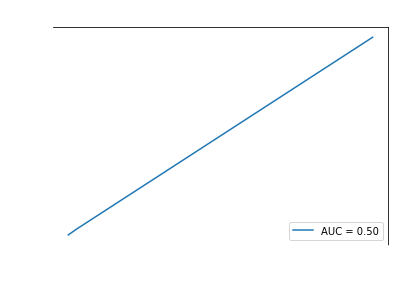

In [22]:
y_pred = model.fit(x_train, y_train).predict(x_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
AUROC = metrics.auc(fpr, tpr)

disp = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=AUROC)



fig = plt.figure()
ax = fig.add_subplot()
ax.tick_params(axis='x', colors='white') 
ax.tick_params(axis='y', colors='white') 
ax.spines['left'].set_color('white') 
ax.spines['bottom'].set_color('white') 

plt.rcParams['figure.figsize'] = [10, 10]
plt.xlabel("X",fontsize=20, color='white')
plt.ylabel("Y",fontsize=20, color='white')
plt.title("Area Under ROC Curve", fontsize = 20, color='white')

disp.plot(ax)

plt.show()

# Getting Prediction for Test Data

Loading in test training data

In [ ]:
test_x = pd.read_json(PATH_TO_CDS + 'test1/review_test.json')
test_y = pd.read_json(PATH_TO_CDS + 'test1/product_test.json')

Make prediction

In [ ]:
model.fit(merged_x) #?????
predictions = model.predict(test_x)
predictions = pd.merge(test_y,predictions,'inner','asin') #not sure if needed

Output predictions to file!

In [ ]:
#turn predictions into json
json_str = predictions.to_json()

#output json to file
with open('predictions.json', 'w') as f:
    f.write(json_str)